Import Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib

sns.set(style="whitegrid")

Load Feature Data

In [8]:
features_df = pd.read_csv("../outputs/county_clusters_2023.csv")
print("✅ Features loaded.")

✅ Features loaded.


Forecast Homeless Count for 2024

In [9]:
# Filter to necessary features
forecast_features = ["BURDEN_PER_1000", "VULNERABLE_PCT", "YOY_CHANGE", "ROLLING_MEAN_3YR"]
features_df = features_df.dropna(subset=forecast_features + ["HOMELESS_COUNT"])

X = features_df[forecast_features]
y = features_df["HOMELESS_COUNT"]

# Train Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Forecast for 2024
features_df["PREDICTED_2024"] = model.predict(X)

Plot Forecast vs Actual

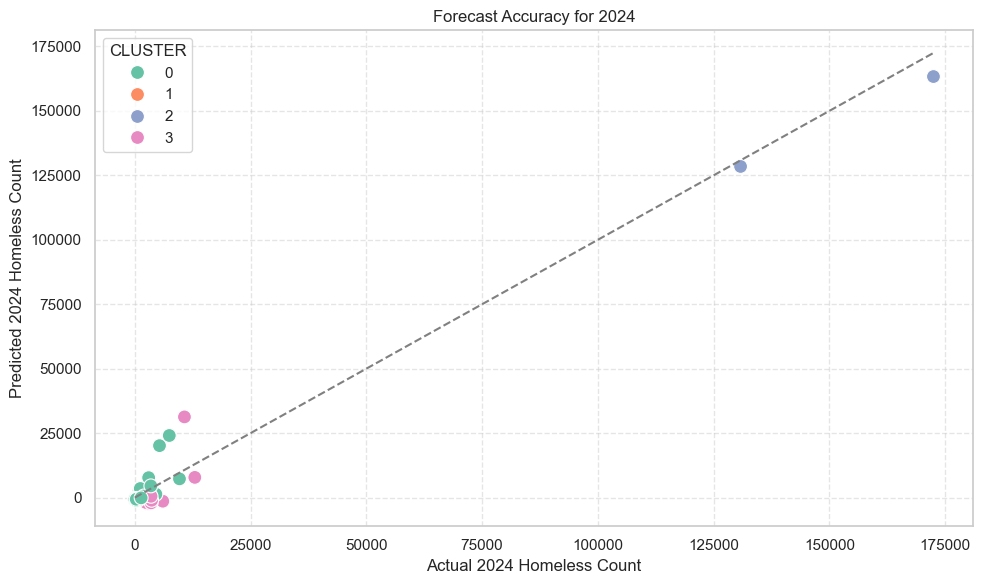

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=features_df, x="HOMELESS_COUNT", y="PREDICTED_2024", hue="CLUSTER", palette="Set2", s=100)
plt.plot([y.min(), y.max()], [y.min(), y.max()], linestyle="--", color="gray")
plt.xlabel("Actual 2024 Homeless Count")
plt.ylabel("Predicted 2024 Homeless Count")
plt.title("Forecast Accuracy for 2024")
plt.tight_layout()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()



Recommend 3 Counties for Intervention

In [11]:
# Calculate residuals (difference between forecast and actual)
features_df["RESIDUAL"] = features_df["HOMELESS_COUNT"] - features_df["PREDICTED_2024"]

# Top underperforming (actual >> predicted)
underpredicted = features_df.sort_values("RESIDUAL", ascending=False).head(3)

# Display recommendations
print("\n📌 Recommended Counties for Intervention:")
display(underpredicted[["LOCATION_ID", "CALENDAR_YEAR", "HOMELESS_COUNT", "PREDICTED_2024", "RESIDUAL"]])

# Explain rationale
print("\n✅ These counties show higher-than-expected homelessness counts relative to what the model predicted based on structural indicators.\nThis may indicate unmet needs or under-resourced services — making them top candidates for additional funding or programmatic intervention.")




📌 Recommended Counties for Intervention:


,LOCATION_ID,CALENDAR_YEAR,HOMELESS_COUNT,PREDICTED_2024,RESIDUAL
0,All,2024,172485.0,163335.119571,9149.880429
87,CA-514,2024,6056.0,-1401.089437,7457.089437
190,CA-604,2024,3528.0,-2044.891084,5572.891084



✅ These counties show higher-than-expected homelessness counts relative to what the model predicted based on structural indicators.
This may indicate unmet needs or under-resourced services — making them top candidates for additional funding or programmatic intervention.


Save Forecast Results

In [12]:
features_df.to_csv("../outputs/forecast_2024_results.csv", index=False)
print("\n📁 Forecast saved to ../outputs/forecast_2024_results.csv")



📁 Forecast saved to ../outputs/forecast_2024_results.csv
